# งบประมาณของกทมประจำปี 2563_Word Could

In [1]:
!pip install pythainlp

     |████████████████████████████████| 13.1MB 316kB/s 
     |████████████████████████████████| 747kB 45.5MB/s 


In [2]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
import pandas as pd
import numpy as np

In [3]:
# ดาว์โหลดไฟล์ csv  จาก 1_bangkok_final
df = pd.read_csv('/content/drive/My Drive/project/bangkok/df1.csv')
print(df.head(5))

   Unnamed: 0  Index  ... รายจ่ายโครงการ       งบประมาณ
0           0      1  ...      486536500  กรุงเทพมหานคร
1           1      1  ...     2700000000  กรุงเทพมหานคร
2           2      1  ...      650000000  กรุงเทพมหานคร
3           3      1  ...      200000000  กรุงเทพมหานคร
4           4      1  ...       20000000  กรุงเทพมหานคร

[5 rows x 9 columns]


In [4]:
import re
# เพิ่มคำที่ช่วยในการตัดคำให้มีประสิทธิภาพมากขึ้น
ad=[]
with open("/content/drive/My Drive/project/bangkok/token_add.txt", "r") as file:
   for line in file:
        line=re.sub('\n','',line)
        ad.append(line)    
add_word=set(ad)

In [5]:
!pip install stop_words
# !pip install deepcut

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp36-none-any.whl size=32916 sha256=441a41a9ca01d135051f11685499ce2a86aac5c3f981c8a3413e822bc4bb16e5
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [6]:
from pythainlp.tokenize import word_tokenize
import pythainlp
from pythainlp.util import dict_trie
from pythainlp.corpus.common import thai_words
from pythainlp.tokenize import Tokenizer

# ๖ัดคำโดยใช้ pythainlp
custom_dict = set(thai_words())
custom_dict .update(add_word)
trie = dict_trie(dict_source=custom_dict)
text= df['โครงการ'].tolist() 
# print(text)
p=[]
for i,x in enumerate(text):
  _tokenizer = Tokenizer(custom_dict=trie, engine='newmm')
  g=_tokenizer.word_tokenize(x)
  print(i,g)  
  p.append(g)

0 ['เงินสำรอง', 'จ่าย', 'ท่ัว', 'ไป']
1 ['เงินช่วยเหลือ', 'ข้าราชการ', 'และ', 'ลูกจ้าง']
2 ['เงินบำเหน็จ', 'ลูกจ้าง']
3 ['ค่าติดต้ังไฟฟ้า', 'สาธารณะ']
4 ['เงินสำรอง', 'สำหรับ', 'ค่า', 'งาน', 'ส่วน', 'ท่ี', 'เพ่ิม', 'ตาม', 'สัญญา', 'แบบ', 'ปรับราคา', 'ได้']
5 ['เงินสำรอง', 'สำหรับ', 'ค่าใช้จ่าย', 'เก่', 'ียว', 'กับ', 'บุคลากร']
6 ['ค่าใช้จ่าย', 'เก่', 'ียว', 'กับ', 'ภารกิจ', 'และ', 'หรือ', 'นโยบาย', 'ท่ี', 'ได้', 'รับมอบ', 'จาก', 'รัฐบาล']
7 ['เงิน', 'รางวัล', 'และ', 'เงินช่วยเหลือ', 'สำหรับ', 'ผล', 'การปฏิบัติ', 'ราชการ', 'ประจำปี']
8 ['เงินสำรอง', 'สำหรับ', 'ภาระผูกพัน', 'ท่ี', 'ค้าง', 'จ่าย', 'ตามกฎหมาย']
9 ['เงิน', 'ช่วย', 'ค่าครองชีพ', 'ผู้', 'ได้รับ', 'บำนาญ', 'ของ', 'กรุงเทพมหานคร']
10 ['เงินสำรอง', 'สำหรับ', 'จ่าย', 'เป็น', 'เงินบำเหน็จ', 'บำนาญ', 'ข้าราชการ', 'กรุงเทพมหานคร']
11 ['งานบริหาร', 'ท่ัว', 'ไป']
12 ['งานบริหาร', 'ท่ัว', 'ไป']
13 ['งานบริหาร', 'งานบุคคล']
14 ['งานบริหาร', 'ท่ัว', 'ไป']
15 ['โครง', 'การพัฒนา', 'ระบบ', 'สารบรรณ', 'อิเล็กทรอนิกส์', 'ของ', 'กรุงเทพมหานคร'

In [7]:
# แปลงข้อมูลให้อยู่ในรูป list และลบ  !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
import string
def twolist_to_list(lis):
    b = []
    for xs in lis:
        for x in xs:
            s = re.sub('[%s]' % re.escape(string.punctuation), '', str(x))
            b.append(s)
    return b
h=twolist_to_list(p)
# print(h)


In [ ]:
# !pip install stop_words

In [8]:
# เพิ่มคำที่ต้องการตัดออกใน stopwords
from pythainlp.corpus import thai_stopwords
stopwords= set(thai_stopwords()) 
words = ['งาน','โครงการ','โครง', 'ท่ี','เพ่','ทั่ว','ิส','ิม','นว','ล','โรง','งานการ','ที่','ทั่ว','ตัน','ผู้','ไป','']
stopwords.update(words)
print(len(stopwords))

1043


In [9]:
#  ตัดคำที่อยู่ใน stopword ออก
filtered_sentence = [w for w in h if len(h)>3]
filtered_sentence = [w for w in filtered_sentence if not w in stopwords]
# filtered_sentence

In [10]:
# หาคำที่มีความถี่มากที่สุด 10 อันดับ
import nltk
fdist1 = nltk.FreqDist(filtered_sentence)
f=fdist1.most_common()
# print(f)
gh=pd.DataFrame(f,columns=['word','frequency'])
print(gh.head(10))
# gh.to_csv('frequency.csv')

         word  frequency
0   งานบริหาร        177
1    ก่อสร้าง        118
2        ระบบ         84
3      ควบคุม         75
4         ถนน         68
5       พัฒนา         64
6        คลอง         59
7  บำรุงรักษา         57
8    ระบายน้ำ         54
9     การคลัง         53


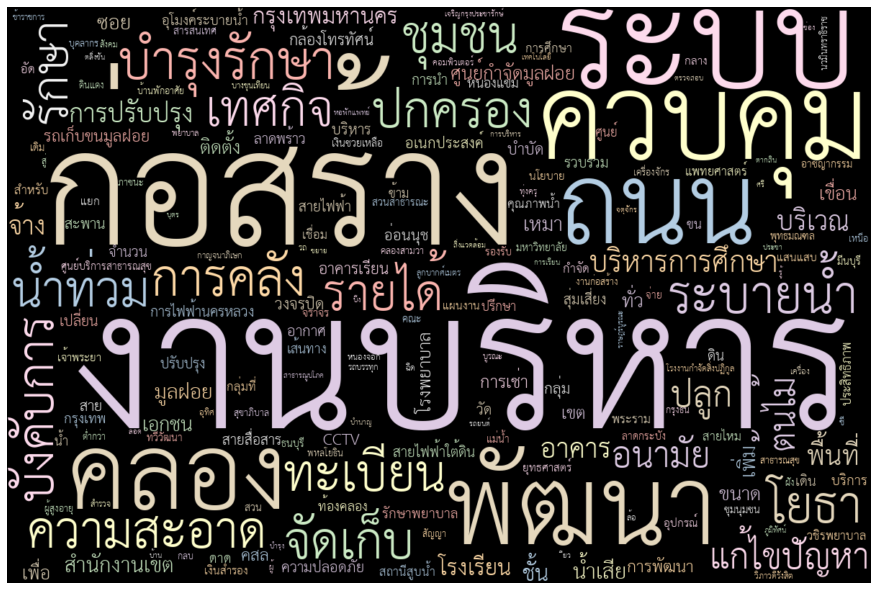

In [16]:
#  wordcolud ที่แสดงคำที่มีความถี่สูงสุด
regexp = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud(font_path='/content/drive/My Drive/project/bangkok/THSarabunNew.ttf',
                  width = 1200, height = 800, 
                background_color ='black', 
                colormap='Pastel1',
                regexp=regexp,
                collocations=False,
                # mask=mask
                min_font_size = 15
                ).generate(' '.join(filtered_sentence))
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
wordcloud.to_file("output.png") 

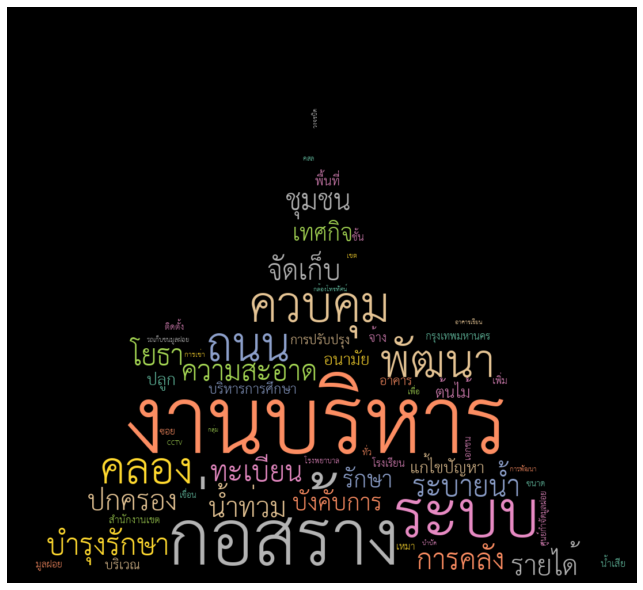

In [43]:
from PIL import Image
regexp = r"[ก-๙a-zA-Z']+"
mask = np.array(Image.open('/content/drive/My Drive/project/bangkok/kisspng-thailand-clip-art-thailand-golden-palace-5a7ce1e8a16771.6471186115181337366611.png'))
wordcloud = WordCloud(font_path='/content/drive/My Drive/project/bangkok/THSarabunNew.ttf',
                  width = 1200, height = 800, 
                background_color ='black', 
                colormap='Set2',
                regexp=regexp,
                collocations=False,
                mask=mask,
                min_font_size = 15
                ).generate(' '.join(filtered_sentence))
# plot the WordCloud image                        
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
# plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()
wordcloud.to_file("output_mask.png") 